In [ ]:
#Unpickling the data
import pickle

with open("/content/images.p","rb") as f:
  images = pickle.load(f)
with open("/content/labels.p","rb") as f:
  labels = pickle.load(f)

In [ ]:
print(images.shape)
print(labels.shape)

(196, 100, 100)
(196,)


In [ ]:
set(labels)

{np.str_('Rishi'), np.str_('Tasha')}

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

labels = le.fit_transform(labels)

In [ ]:
set(labels)

{np.int64(0), np.int64(1)}

In [ ]:
le.inverse_transform([0,1])

array(['Rishi', 'Tasha'], dtype='<U5')

In [ ]:
p = len(set(labels))
print("Total number of Persons : ",p)

Total number of Persons :  2


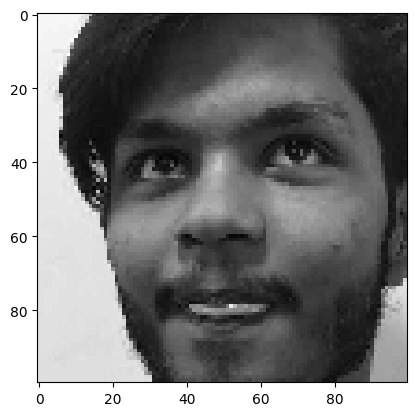

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[15],cmap='gray')
plt.show()

In [ ]:
import cv2

In [ ]:
def preprocessing(img):
  img = cv2.equalizeHist(img)
  img = img.reshape(100,100,1)
  img = img/255
  return img

In [ ]:
import numpy as np

In [ ]:
images = np.array(list(map(preprocessing,images)))
print("Shape of Input : ",images.shape)

Shape of Input :  (196, 100, 100, 1)


In [ ]:
from keras.utils import to_categorical
labels = to_categorical(labels)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from keras.layers import Conv2D, MaxPooling2D, Flatten

In [ ]:
#Model Training
def Lenet_Model():
  model = Sequential()
  #Convolutional and ReLU Layer
  model.add(Conv2D(30,(5,5),input_shape=(100,100,1),activation='relu'))
  #MaxPooling Layer
  model.add(MaxPooling2D(pool_size=(2,2)))

  #Convolutional and ReLU Layer
  model.add(Conv2D(15,(3,3),activation='relu'))
  #MaxPooling Layer
  model.add(MaxPooling2D(pool_size=(2,2)))

  #Flatten Layer/Input Layer
  model.add(Flatten())

  #Hidden Layers
  model.add(Dense(50,activation='relu'))

  #Output Layer
  model.add(Dense(p,activation='softmax'))
  model.compile(Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model = Lenet_Model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 96, 96, 30)     │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7935)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │       396,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401,696 (1.53 MB)

 Trainable params: 401,696 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
h = model.fit(images,labels,validation_split=0.1,epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 417ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 569ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 323ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 312ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step - accuracy: 1.0000 - lo

In [ ]:
model.save('final_model.h5')